# Test 

In [ ]:
import torch
import torch_geometric
from torch_geometric.datasets import Planetoid
import torch_geometric.utils as pygu

In [ ]:
dataset = Planetoid(root="Testnb",name= "Cora")
print(dataset)
print("number of graphs:\t\t",len(dataset))
print("number of classes:\t\t",dataset.num_classes)
print("number of node features:\t",dataset.num_node_features)
print("number of edge features:\t",dataset.num_edge_features)

In [ ]:
print(dataset.data)

In [ ]:
import torch_geometric.utils as pygu
pygu.contains_self_loops(dataset.edge_index)

In [ ]:
dataset.edge_index[:,:10]

In [ ]:
dataset.x

In [ ]:
x = torch.tensor([[1,2,3,4],[5,6,7,8]])
print(x)
print(x.dim())
print("0")
print(x.unsqueeze(0))
print("1")
print(x.unsqueeze(1))
print("-1 = 2")
print(x.unsqueeze(-1))
print("0 + -1")
print(x.unsqueeze(0).unsqueeze(-1))


In [ ]:
x = torch.tensor([1,2,3,4]).unsqueeze(1)
print(x)
print("cat without dimension : ", torch.cat((x,x)))
torch.cat((x,x),1)

In [ ]:
from models.NM import NeuroMatchNetwork 
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root="/tmp/ENZYMES", name="ENZYMES")
testNMN = NeuroMatchNetwork()
print(testNMN)

In [ ]:
import networkx as nx 
import random
from tqdm import tqdm
train_len = int(0.8 * len(dataset))
train, test = [], []
dataset = list(dataset)
print(dataset)
random.shuffle(dataset)
print(dataset)
has_name = hasattr(dataset[0], "name")
print(has_name)
print(type(dataset))
for i, graph in tqdm(enumerate(dataset)):
    if not type(graph) == nx.Graph:
        if has_name: del graph.name
        graph = pygu.to_networkx(graph).to_undirected()
    if i < train_len:
        train.append(graph)
    else:
        test.append(graph)

In [ ]:
train[:2]

## Graph Generations 

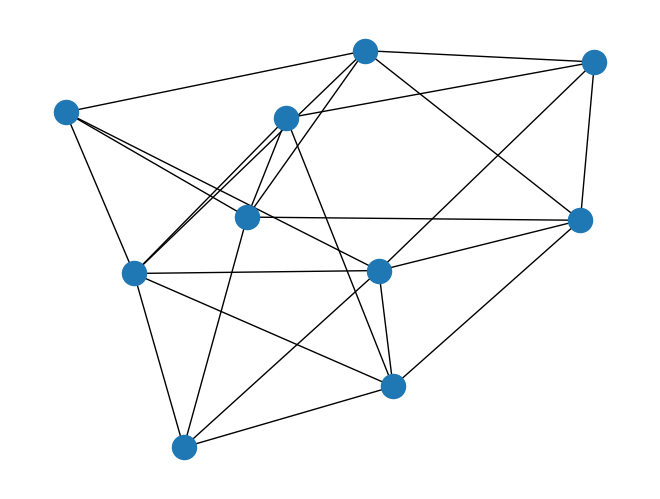

In [1]:
import data.random_graph_generator as rgg 
import networkx as nx
import matplotlib.pyplot as plt

#For the test, let's take a possible range of sizes of graphs 
sizes = range(3,11)

#Erdos-Renyi model generator
ergen = rgg.ERGenerator(sizes) #Let's use alpha = 1.3 the default value
G = ergen.generate()
nx.draw(G)
plt.draw()

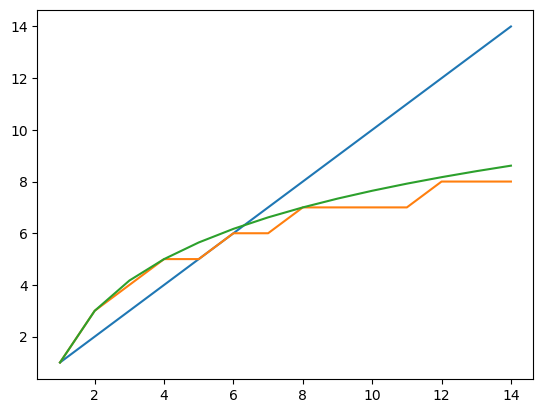

In [2]:
#Original git parameters 
import numpy as np 
import matplotlib.pyplot as plt 
M, FM = [], []
for n in range(1,15) : 
    m = int(2 * np.log2(n))+1
    fm = (2 * np.log2(n)) +1 
    M.append(m)
    FM.append(fm)
    
plt.plot(list(range(1,15)),list(range(1,15)))
plt.plot(list(range(1,15)), M)
plt.plot(list(range(1,15)), FM)
plt.show()

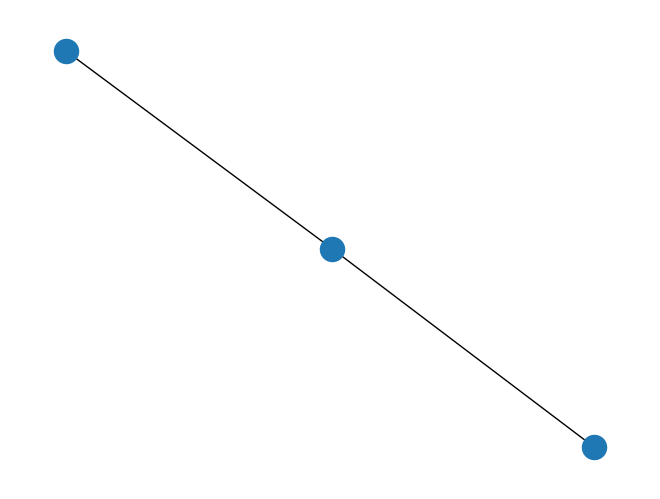

In [3]:
#Barabasi Albert model generator
bagen = rgg.BAGenerator(sizes)
G = bagen.generate()
nx.draw(G)

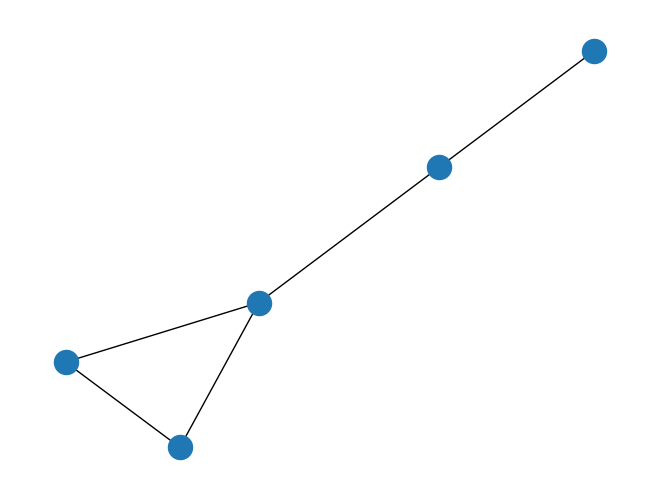

In [4]:
wsgen = rgg.WSGenerator(sizes)
G = wsgen.generate()
nx.draw(G)

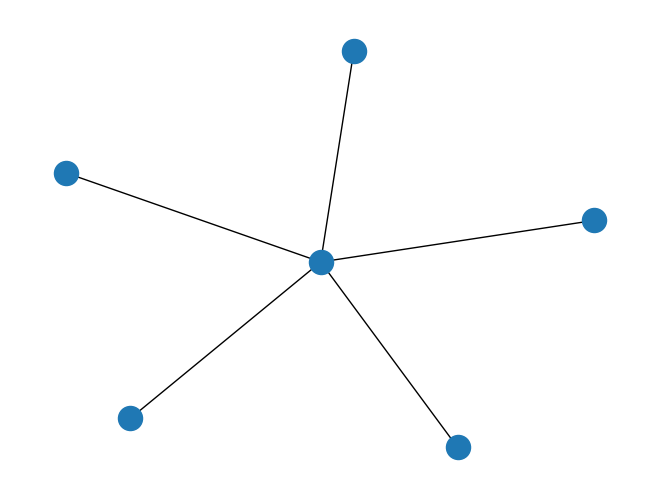

In [5]:
plcgen = rgg.PLCGenerator(sizes) #max_triangle_prob: float = 0.5
G = plcgen.generate()
nx.draw(G)

In [6]:
gen_list = [ergen,wsgen,bagen,plcgen]
rdgen = rgg.RandomGenerator(sizes)

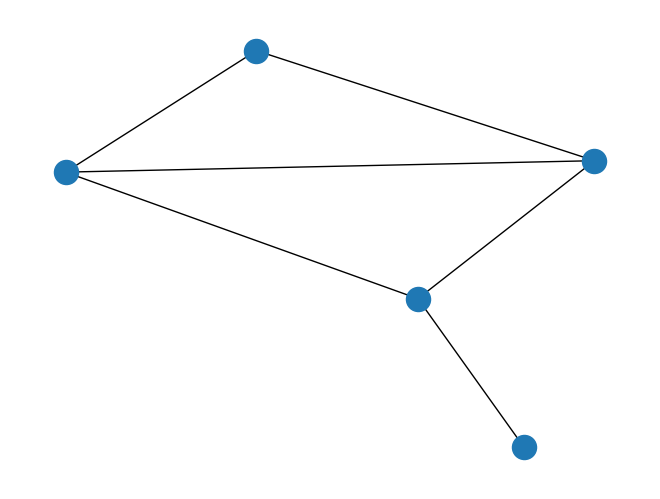

In [7]:
nx.draw(rdgen.generate())


## DataLoaders 

### OTFContainer

In [ ]:
from data.loaders import OTFContainer
import data.random_graph_generator as rgg
sizes = range(3,11)
epoch_size = 2
batch_size = 64
generator = rgg.RandomGenerator(sizes)
dataset_length = (batch_size//2) * epoch_size
OTF_ds = OTFContainer(generator,dataset_length)

In [ ]:
for g in OTF_ds :
    print(g)
    break

In [ ]:
len(OTF_ds)

In [ ]:
OTF_ds[2]

In [ ]:
from torch_geometric.loader import DataLoader
single_loader_batch_size = batch_size//2
otf_dl = DataLoader(OTF_ds, batch_size=single_loader_batch_size)

In [ ]:
len(otf_dl)

In [ ]:
for k in otf_dl :
    print(k)

In [ ]:
otf_dl = DataLoader(OTF_ds, batch_size=single_loader_batch_size)
for a,b in zip(otf_dl,[1,2]) : 
    print(a)
    print(b)

### Dataloader

In [2]:
from data.loaders import gen_data_loaders
from data.random_graph_generator import random_generator
gen = random_generator(list(range(3,10)))
loaders = gen_data_loaders(10,64,generator=gen)

for i in loaders:
    print(i)


[None, None, None, None, None, None, None, None, None, None]


In [3]:
n = 1
for batch_target, batch_neg_target, batch_neg_query in zip(*loaders):
    print(f"cycle : {n}")
    n+=1
    print(f"Printing loader length : {len(loaders[0])}")
    
    print("batch_target : ")
    print(batch_target)
    
    print("batch_neg_target : ")
    print(batch_neg_target)

    
    print("batch_neg_query : ")
    print(batch_neg_query)

print("end")

cycle : 1
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 602], num_nodes=203, batch=[203], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 478], num_nodes=180, batch=[180], ptr=[33])
batch_neg_query : 
None
cycle : 2
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 582], num_nodes=199, batch=[199], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 518], num_nodes=186, batch=[186], ptr=[33])
batch_neg_query : 
None
cycle : 3
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 482], num_nodes=173, batch=[173], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 424], num_nodes=172, batch=[172], ptr=[33])
batch_neg_query : 
None
cycle : 4
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 550], num_nodes=203, batch=[203], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 602], num_nodes=195, batch=[195], ptr=[33])
batch_neg_query : 
None
cycle : 5
Printing loader length : 10
batch_target : 
Da

In [4]:
import networkx as nx
print(f"batch_target : {batch_target}\nlength : {len(batch_target)}\ntype : {type(batch_target)}") 
print(f"number of graphs : {batch_target.num_graphs}\nAs a list : \n{list(batch_target)}\nlist length : {len(list(batch_target))}")

batch_target : DataBatch(edge_index=[2, 630], num_nodes=197, batch=[197], ptr=[33])
length : 32
type : <class 'torch_geometric.data.batch.DataBatch'>
number of graphs : 32
As a list : 
[('edge_index', tensor([[  0,   0,   0,  ..., 196, 196, 196],
        [  1,   4,   2,  ..., 192, 193, 195]])), ('num_nodes', 197), ('batch', tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  7,
         8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
        10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12,
        13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
        15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18,
        18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21,
        21, 21, 22, 22, 22, 22, 23

In [6]:
print(batch_target.get_example(0))

Data(edge_index=[2, 48], num_nodes=8)


## Batch handling

In [ ]:
import random
import numpy as np
import networkx as nx
from deepsnap.batch import Batch 
from deepsnap.graph import Graph as DSGraph
from data.batchs import gen_batch
from data.random_graph_generator import random_generator
from data.loaders import gen_data_loaders

epoch_size = 10
gen = random_generator(np.arange(5 + 1, 29 + 1))
loaders = gen_data_loaders(epoch_size,batch_size= 64,generator=gen)

print(loaders)

for batch_target, batch_neg_target, batch_neg_query in zip(*loaders): #Unzipping for test 
    break


neg_target = batch_neg_target

hard_neg_idxs = set(random.sample(range(len(neg_target.G)),
            int(len(neg_target.G) * 1/2)))

batch_neg_query = Batch.from_data_list(
            [DSGraph(gen.generate(size=len(g))
                if i not in hard_neg_idxs else g)
                for i, g in enumerate(neg_target.G)])

#pos_a, pos_b, neg_a, neg_b = gen_batch(batch_target,batch_neg_target, batch_neg_query, True,generator=gen)

In [ ]:
batch_neg_query

In [ ]:
batch_neg_target

In [ ]:
batch_target

In [ ]:
for graph in batch_target.G : 
    print(graph.nodes)

In [ ]:
hard_neg_idxs

In [ ]:
from data.batchs import gen_batch
pos_a, pos_b, neg_a, neg_b = gen_batch(batch_target,batch_neg_target, batch_neg_query, True)